In [1]:
import sys
sys.path.append("/Users/mocquin/MYLIB10/MODULES/noise3D/")

In [2]:
import noise3d
import noise3d.spectrum

T = V = H = 100

seq = noise3d.genseq.genseq_tvh(T, V, H, 0, 1)

# Compute PSDs

In [3]:
# return 7 matrix of shape T*V*H
psds = noise3d.spectrum.compute_psd(seq, names=True)
print(len(psds))
print(psds[-1])

8
('t', 'v', 'h', 'tv', 'th', 'vh', 'tvh', 'tot')


# Compute variances using psds

These spectrum approach to compute variance give simillar results to the corrected matrix approach.

In [4]:
vars_psds = noise3d.spectrum.compute_var(seq, names=True)
vars_psds

(2.332482716139032e-06,
 -2.5938062994937017e-05,
 -1.299516248365465e-05,
 0.00011275866904650934,
 0.00018907785463255725,
 5.5653421533189685e-05,
 0.9996056388490588,
 0.9999265280515086,
 ('t', 'v', 'h', 'tv', 'th', 'vh', 'tvh', 'tot'))

Another faster version is available : 

In [5]:
vars_other = noise3d.spectrum.var_psd_astrid(seq, names=True)
vars_other

/Users/mocquin/MYLIB10/MODULES/noise3D/noise3d/spectrum.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  norm_psd = norm_psd.astype(np.float128, copy=False)


(2.3324827161390493697e-06,
 -2.5938062994937018027e-05,
 -1.2995162483654648113e-05,
 0.000112758669046507571574,
 0.00018907785463255524197,
 5.5653421533181094677e-05,
 0.999605638849058967,
 0.9999265280515087583,
 ('t', 'v', 'h', 'tv', 'th', 'vh', 'tvh', 'tot'))

# Comparing all methods (classic, correct, matrix, spectrum)

## Timeit

In [6]:
# spectrum based
%timeit noise3d.spectrum.var_psd_astrid(seq)
%timeit noise3d.spectrum.compute_var(seq)
# classic approach
%timeit noise3d.noise.get_all_3d_noise_var_fast(seq)
%timeit noise3d.noise.get_all_3d_noise_var_classic(seq)
# matrix approach
%timeit noise3d.noise.get_all_3d_classic_var_matrix(seq)

94.1 ms ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
198 ms ± 10.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.69 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
37.5 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
7.6 ms ± 292 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Values

In [7]:
classic = noise3d.noise.get_all_3d_noise_var_classic(seq, names=True)
names = classic[-1]
classic = classic[:-1]
classic_fast = noise3d.noise.get_all_3d_noise_var_fast(seq)
classic_matrix = noise3d.noise.get_all_3d_classic_var_matrix(seq)
corrected_matrix = noise3d.noise.get_all_3d_corrected_var_matrix(seq)
spectrum_faster = noise3d.spectrum.var_psd_astrid(seq)
spectrum_classic = noise3d.spectrum.compute_var(seq)

for cla, claf, clam, corm, specf, spec, name in zip(classic,
                                                    classic_fast,
                                                    classic_matrix,
                                                    corrected_matrix,
                                                    spectrum_faster, 
                                                    spectrum_classic,
                                                    names):
    print(f"Variance {name}")
    print(cla)
    print(claf)
    print(clam)
    print(corm)
    print(specf)
    print(spec)
    print()

Variance t
0.00010531141183783557
0.0001053114118378356
0.0001053114118378356
2.332482716139051e-06
2.3324827161390493697e-06
2.332482716139032e-06

Variance v
7.570662179576579e-05
7.570662179576578e-05
7.570662179576578e-05
-2.593806299493701e-05
-2.5938062994937018027e-05
-2.5938062994937017e-05

Variance h
8.941271416290862e-05
8.941271416290864e-05
8.941271416290861e-05
-1.2995162483654685e-05
-1.2995162483654648113e-05
-1.299516248365465e-05

Variance tv
0.009908640501942305
0.009908640501942305
0.009906848244183558
0.00011275866904650669
0.000112758669046507571574
0.00011275866904650934

Variance th
0.009983448416526649
0.009983448416526649
0.009981520454883078
0.00018907785463255494
0.00018907785463255524197
0.00018907785463255725

Variance vh
0.009852666051409442
0.00985266605140944
0.00985103120649896
5.56534215331811e-05
5.5653421533181094677e-05
5.5653421533189685e-05

Variance tvh
0.9699173216869249
0.9699116729134871
0.9699170279777999
0.9996056388490595
0.999605638849058

# Some basic but usefull things about DFT

In [2]:
demo = spec.SpectrumDemo()

In [3]:
demo.DFT_property_origin_value_vs_sum()

Sum of raw_seq : np.sum(seq):
-2154.4082668338815
Square root of mod2 of seq dft :
2154.4082668338824


In [4]:
demo.DFT_property_mean_mod2_vs_sum_of_squared()

Sum of squared raw_seq : np.sum(raw_seq**2)
1000408.3622236205
Mean of mod2 : 
1000408.36222362


In [5]:
demo.DFT_property_relation_to_variance()

Remove mean value of raw_seq...
Sum of squared raw_seq : np.sum(raw_seq**2)
1000403.7207486402
Mean of mod2 : 
1000403.7207486398
N times Variance of seq
1000403.7207486402


In [6]:
demo.DFT_property_Parseval()

Mean of mod2
1000408.36222362
Sum of squared signal
1000408.3622236205
N times Variance of 0-mean seq
1000403.7207486402


# Compare ways to get the psd

There are 2 ways to get the 3d Power Spectral Density (psd) of the input seq : 
 - taking the squared module of the DFT
 - summing all 7 noise psds
 
These intend to compare the results.

In [7]:
demo = spec.SpectrumDemo()

In [8]:
demo.sums_of_psds()


Sum of mod2
1000935092978.7319
Sum of psd
1000931048030.3866
Error : 4.041185807324155e-06


In [9]:
demo = spec.SpectrumDemo(zero_mean=True) # the input seq must be 0 mean for the recombination to work
demo.origin_value_close_to_zero()

2.8185805615108817e-23
3.2311742677852644e-23


In [10]:
demo.vars_of_pdsd()

999141225266.3962
999143948514.8547


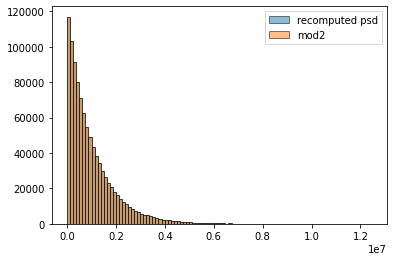

In [11]:
demo.histograms()